### RNN (Recurrent Neural Network) PyTorch 구현
- 간단하게 알파벳 예측하는 Simple RNN 모델 구현

> 예시
> - h e l l > o
> - a p p l > e
> - hello, apple, hobby, below, wheel

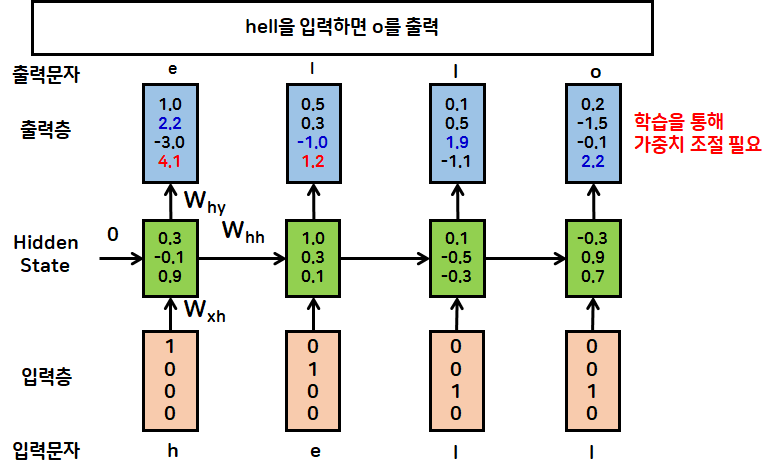

In [ ]:
# 데이터 정의 : 각각의 알파벳들을 원핫벡터로 표현
h = [1,0,0,0,0,0,0,0,0]
e = [0,1,0,0,0,0,0,0,0]
l = [0,0,1,0,0,0,0,0,0]
o = [0,0,0,1,0,0,0,0,0]
a = [0,0,0,0,1,0,0,0,0]
p = [0,0,0,0,0,1,0,0,0]
b = [0,0,0,0,0,0,1,0,0]
y = [0,0,0,0,0,0,0,1,0]
w = [0,0,0,0,0,0,0,0,1]

In [ ]:
# 특성/라벨 정의
import numpy as np
# hello, apple, hobby, below, wheel
X_data = np.array([
    [h, e, l, l],
    [a, p, p, l],
    [h, o, b, b],
    [b, e, l, o],
    [w, h, e, e]
])

In [ ]:
y_data = np.array([o, e, y, w, l])
y_data = np.argmax(y_data, axis = 1)

### 텐서로 변환

In [ ]:
import torch

In [ ]:
X_data = torch.tensor(X_data).float() # 실수형 32비트

In [ ]:
y_data = torch.tensor(y_data).long() # 정수형 64비트

# float() : 실수, 32비트
# double() : 실수, 64비트
# int() : 정수, 32비트
# long() : 정수, 64비트

In [ ]:
X_data.shape

# 5 - 샘플 개수
# 4 - 샘플 하나당 알파벳 개수 → 시퀀스 길이값, 타임 스탭
# 9 - 알파벳 하나의 벡터 차원 → 입력 특성(Features)

In [ ]:
y_data.shape

- 모델 정의

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# 1. 클래스 정의
class RNNClassifier(nn.Module) :
    # 2. 생성자 메서드
    def __init__(
            self,
            input_size: int = 9,    # 입력 벡터의 차원 (여기서는 원핫벡터의 크기)
            hidden_size: int = 2,   # hidden state의 차원 (텐서플로우 units 동일)
            output_size: int = 9) : # 최종 분류할 클래스 수
            super().__init__()      # 초기화 함수

            # 3. 속성 정의(인스턴스 변수)
            self.rnn = nn.RNN(
                input_size = input_size,   # 타입스텝별 벡터의 크기
                hidden_size = hidden_size, # 전달되는 정보의 양
                batch_first = True         # 입력 텐서의 차원 순서를 바꿔주는 역할
            )                              # True → [batch_size, seq_len, input_size]
                                           # False → [seq_len, batch_size, input_size]
            self.fc = nn.Linear(
                in_features = hidden_size,
                out_features = output_size
            )

    # 4. forward 메서드
    def forward(self, x: torch.Tensor) -> torch.Tensor : # 입, 출력에 대한 타입힌트 지정
        out, h = self.rnn(x)
        # out : 타임스탭별 처리된 은닉 출력을 모아둔 텐서
        # h : 마지막 타임스탭의 은닉 상태만 모아둔 텐서
        # h의 모양 : [num_layers(얼마나 겹겹이 쌓일지) * num_directions(단방향 1/양방향 2), batch_size, hidden_size]

        # 차원 제거
        last_hidden = h.squeeze(0) # 0번째 차원 제거

        # 출력층
        logits = self.fc(last_hidden)

        return logits

In [ ]:
import torch.optim as optim

In [ ]:
# 모델 초기화
model = RNNClassifier(input_size = 9, hidden_size = 2, output_size = 9)

# 손실함수
loss_func = nn.CrossEntropyLoss()

# 최적화 함수
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
n_epochs = 100
loss_list = []      # 손실값 누적할 리스트 초기화

In [ ]:
# 루프
for epoch in range(n_epochs) :
    model.train()
    optimizer.zero_grad()
    ouput = model(X_data) # 예측 출력 계산
    loss = loss_func(ouput, y_data) # 오차계산
    loss_list.append(loss.item()) # 기록
    loss.backward()  # 기울기 계산
    optimizer.step() # 업데이트

In [ ]:
loss_list

In [ ]:
# 학습 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 3))
plt.plot(loss_list)

plt.show()

- 예측

In [ ]:
# 예측하는 함수
def predict(model, X_input) :
    model.eval()

    with torch.no_grad() :
        pred = model(X_input)
    return pred

In [ ]:
X_test = np.array([[w, h, e, e]])
X_test = torch.tensor(X_test).float()

In [ ]:
y_pred = predict(model, X_test)

In [ ]:
y_pred

In [ ]:
# 클래스 이름 정의
class_names = ['h', 'e', 'l', 'o', 'a', 'p', 'b', 'y', 'w']

In [ ]:
import pandas as pd

pred_df = pd.DataFrame(y_pred, columns = class_names).T
pred_df.sort_values(by = 0)[::-1]

In [ ]:
class_names[ np.argmax(y_pred) ]